In [1]:
import numpy as np
import os 
from PIL import Image
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
## Data loading 
trainData = "../Data/HC"

new_train = []

for filename in os.listdir(trainData):
    if filename.endswith('.tif'):
        image = Image.open(os.path.join(trainData, filename)) 
        new_train.append(np.asarray( image, dtype="uint8" ))

meanMatrix = np.asarray(new_train)


In [3]:
meanMatrix = meanMatrix.reshape((1575,-1))
scaler = StandardScaler()
scaledData = scaler.fit_transform(meanMatrix)

In [4]:
scaledData.shape

(1575, 27648)

In [5]:
"""
|  It is highly recommended to use another dimensionality reduction
|  method (e.g. PCA for dense data or TruncatedSVD for sparse data)
|  to reduce the number of dimensions to a reasonable amount (e.g. 50)
|  if the number of features is very high.
"""
# PCA 
pca = PCA(n_components=50)
pcatransformedData = pca.fit_transform(scaledData)

In [6]:
pcatransformedData.shape

(1575, 50)

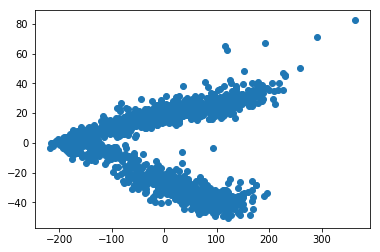

In [17]:
plt.scatter(pcatransformedData[:, 0], pcatransformedData[:, 1])

In [8]:
tsne = TSNE(n_components=2)
transformedData = tsne.fit_transform(scaledData)

In [9]:
transformedData.shape

(1575, 2)

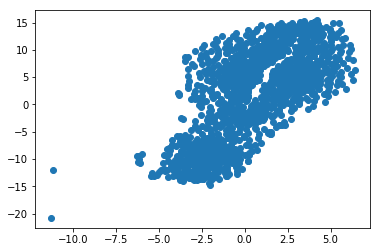

In [10]:
plt.scatter(transformedData[:, 0], transformedData[:, 1])

array([ 11.766994, -12.481535,  10.026034, ...,  -7.493655,  13.002209,
         9.093949], dtype=float32)